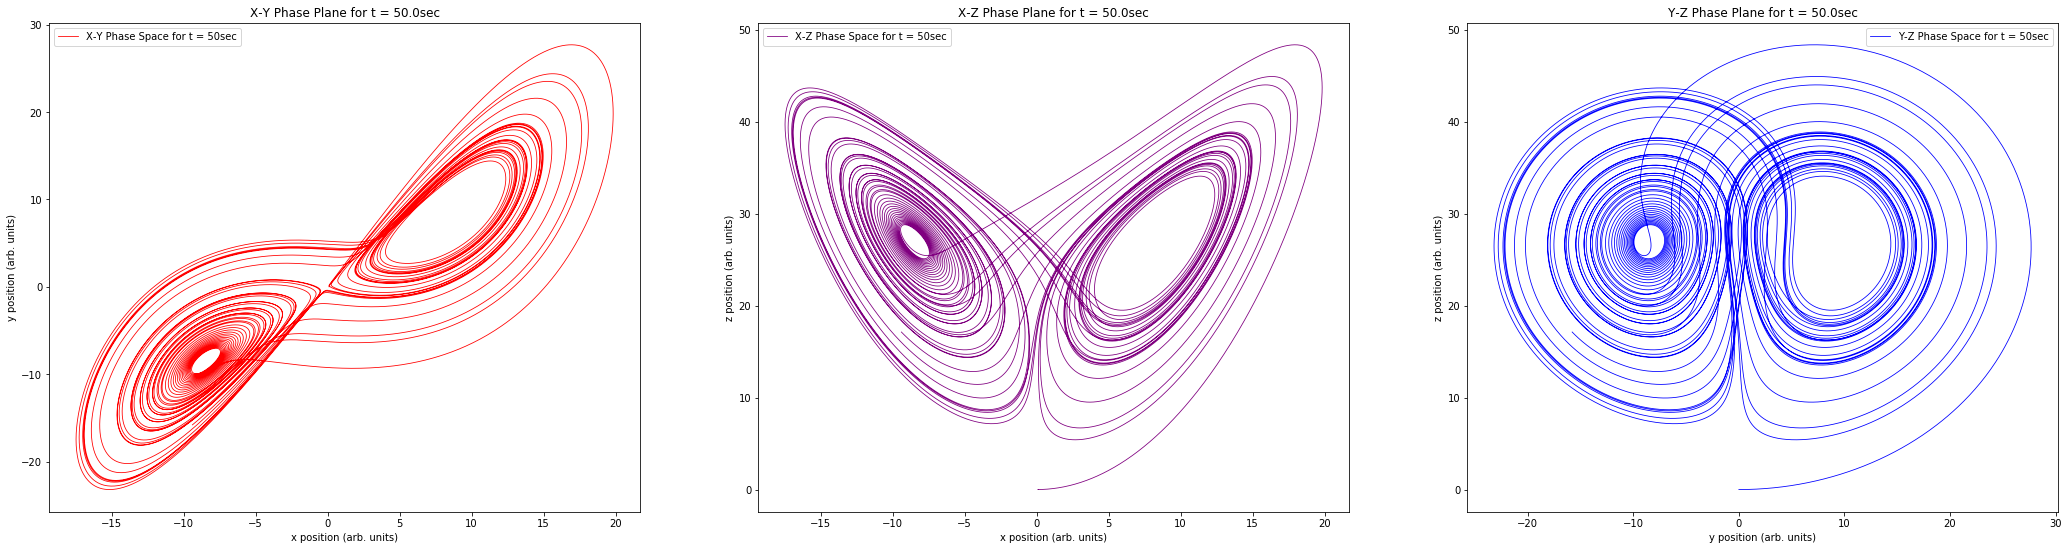

In [2]:
"""
    This script explores properties of a system of nonlinear differential equations known as the
    Lorenz system given below:
                    
                                dx/dt = σ(y-x)
                                dy/dt = x(ρ - z) - y
                                dz/dt = xy - βz
                                    
    Where sigma = 10.0, rho = 28.0, and beta = 8.0/3.0. They describe the atmospheric convection
    This script does 3 things:
          i) Solves numerically the solution to the set of equations
         ii) Plots phase space diagrams for each function as plane projections
        iii) Adds random fluctuations to the initial position in space to show the sensitivity/ chaotic
             nature of the system.
"""
import math
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint


# Constants

# Initial position in space
initial_state = [0.1, 0.0, 0.0]
# System parameters
sigma = 10.0
rho  = 28.0
beta = 8.0/3.0
# lists for plotting
tList = np.arange(0.0, 50.0, 0.001)
xList = []
yList = []
zList = []

# Helper Functions

# This function takes in the initial states of the system in list form, and also takes in a time t.
# It defines the 3 differential equations needed to be solved, and returns them in a list form. This
# format is needed to use the scipy.integrate.odeint function.
def system(initial_state, t):
    x,y,z = initial_state
    dxdt = sigma*(y-x)
    dydt = x*(rho -z) - y
    dzdt = x*y -beta*z
    return [dxdt, dydt, dzdt]


    
# Script
# Get our solved differential solutions from odeint function, takes in the function system that we defined earlier,
# the initial position in space, and the time list. It returns the solutions to the differential equations in list form.
solution = odeint(system, initial_state, tList)

# Plots our graphs xlist = solution[:, 0],y = solution[:, 1], z = solution[:, 2]
fig= plt.figure(figsize=(36,9))
# Graph 1 x-y plot
plt.subplot(1,3,1)
plt.plot(solution[:, 0], solution[:, 1], label='X-Y Phase Space for t = 50sec', linewidth='0.8', color='red')
plt.title("X-Y Phase Plane for t = 50.0sec")
plt.xlabel('x position (arb. units)')
plt.ylabel('y position (arb. units)')
plt.legend();
# Graph 2 x-z plot
plt.subplot(1,3,2)
plt.plot(solution[:, 0], solution[:, 2], label='X-Z Phase Space for t = 50sec', linewidth='0.8', color='purple')
plt.title("X-Z Phase Plane for t = 50.0sec")
plt.xlabel('x position (arb. units)')
plt.ylabel('z position (arb. units)')
plt.legend();
# Graph 3 y-z plot
plt.subplot(1,3,3)
plt.plot(solution[:, 1], solution[:, 2], label='Y-Z Phase Space for t = 50sec', linewidth='0.8', color='blue')
plt.title("Y-Z Phase Plane for t = 50.0sec")
plt.xlabel('y position (arb. units)')
plt.ylabel('z position (arb. units)')
plt.legend();

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
[ 1.00000000e-01  2.07254306e-10 -1.52890482e-10]


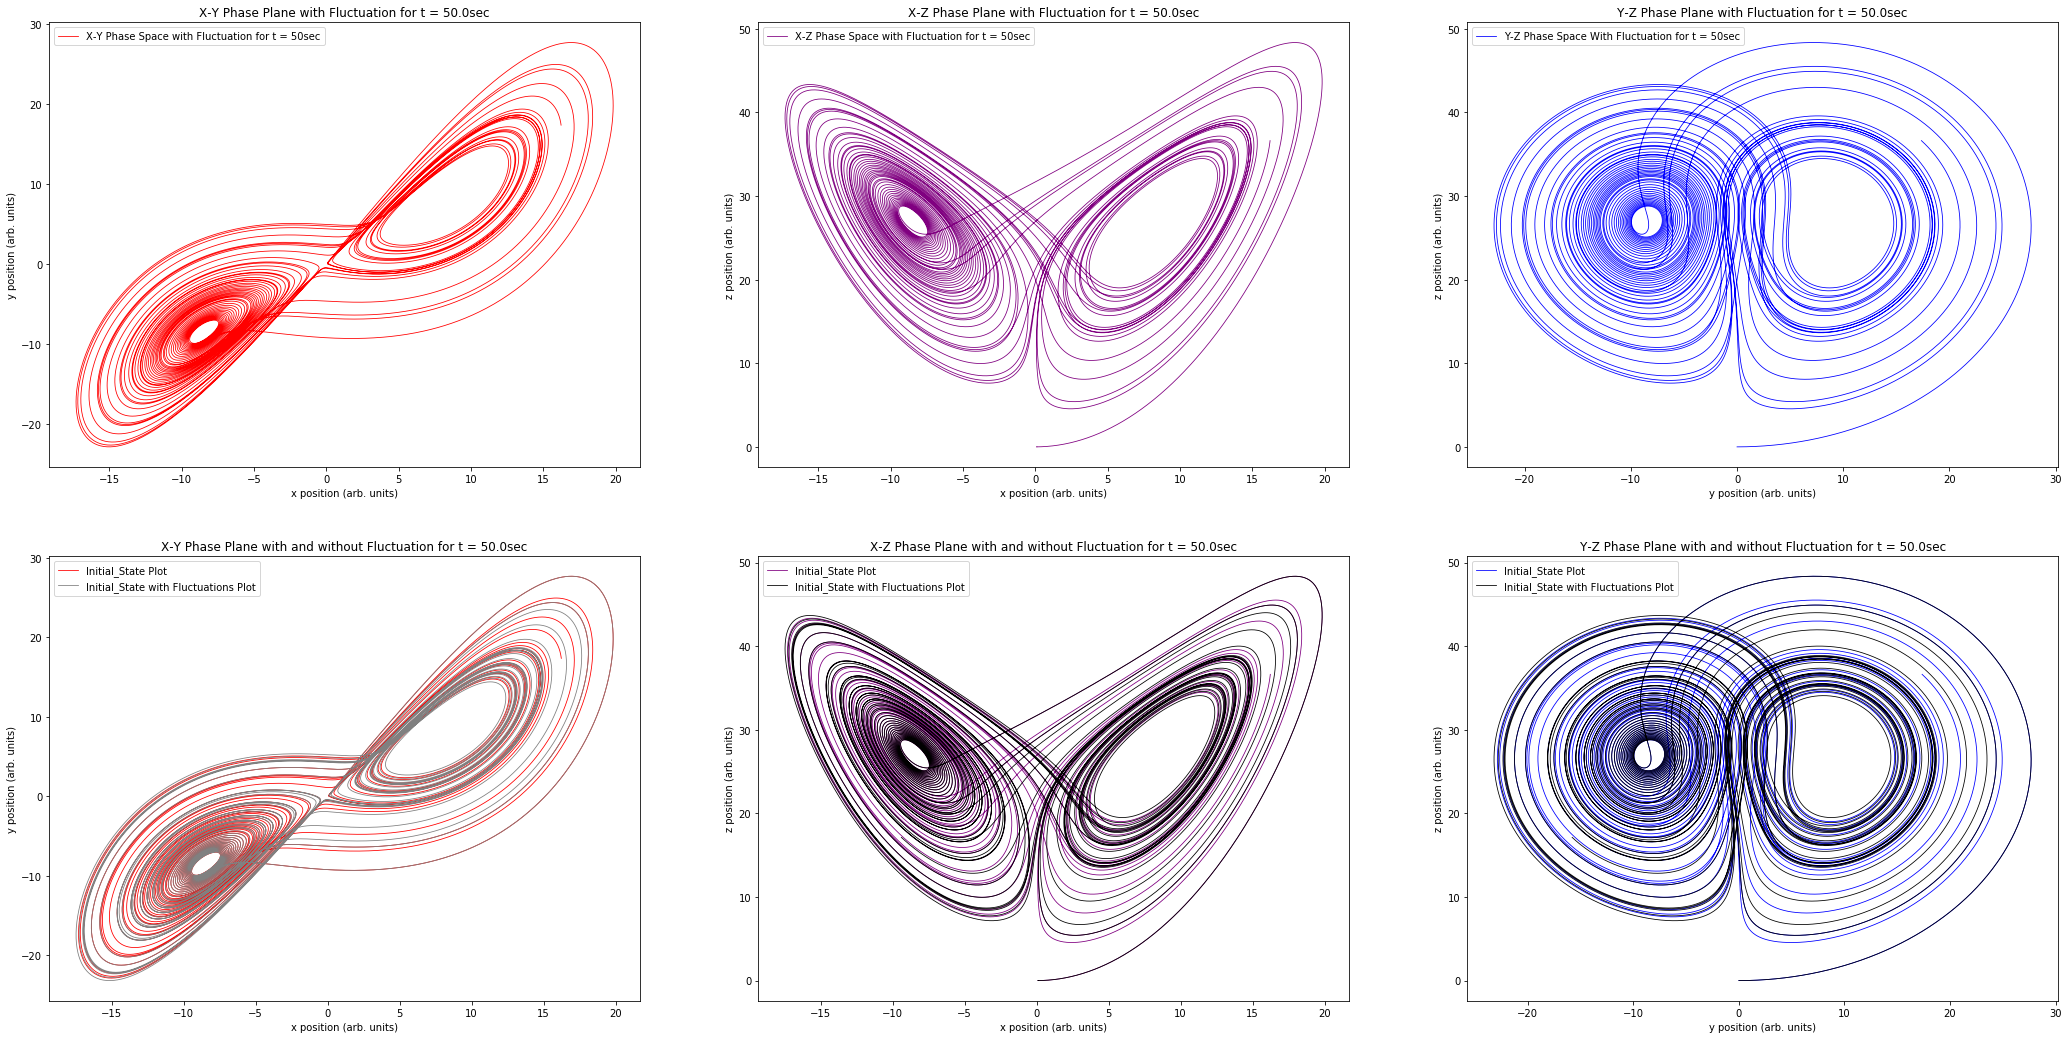

In [3]:
%reset
"""
    Part 2) Adds fluctuations to the initial position, after a long time it will start to react differently
"""
import math
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint


# Constants

# Initial position in space
initial_state = [0.1, 0.0, 0.0] + np.random.randn(3)*(1E-10)
# System parameters
sigma = 10.0
rho  = 28.0
beta = 8.0/3.0
# lists for plotting
tList = np.arange(0.0, 50.0, 0.001)
xList = []
yList = []
zList = []

# Helper Functions

# This function takes in the initial states of the system in list form, and also takes in a time t.
# It defines the 3 differential equations needed to be solved, and returns them in a list form. This
# format is needed to use the scipy.integrate.odeint function.
def system(initial_state, t):
    x,y,z = initial_state
    dxdt = sigma*(y-x)
    dydt = x*(rho -z) - y
    dzdt = x*y -beta*z
    return [dxdt, dydt, dzdt]


    
# Script
# Get our solved differential solutions from odeint function with and without fluctuations
solution = odeint(system, initial_state, tList)
solution1 = odeint(system, [0.1, 0.0, 0.0], tList)

# Plots our graphs xlist = solution[:, 0],y = solution[:, 1], z = solution[:, 2]
fig= plt.figure(figsize=(36,18))
# Graph 1 x-y plot
plt.subplot(2,3,1)
plt.plot(solution[:, 0], solution[:, 1], label='X-Y Phase Space with Fluctuation for t = 50sec', linewidth='0.8', color='red')
plt.title("X-Y Phase Plane with Fluctuation for t = 50.0sec")
plt.xlabel('x position (arb. units)')
plt.ylabel('y position (arb. units)')
plt.legend();
# Graph 2 x-z plot
plt.subplot(2,3,2)
plt.plot(solution[:, 0], solution[:, 2], label='X-Z Phase Space with Fluctuation for t = 50sec', linewidth='0.8', color='purple')
plt.title("X-Z Phase Plane with Fluctuation for t = 50.0sec")
plt.xlabel('x position (arb. units)')
plt.ylabel('z position (arb. units)')
plt.legend();
# Graph 3 y-z plot
plt.subplot(2,3,3)
plt.plot(solution[:, 1], solution[:, 2], label='Y-Z Phase Space With Fluctuation for t = 50sec', linewidth='0.8', color='blue')
plt.title("Y-Z Phase Plane with Fluctuation for t = 50.0sec")
plt.xlabel('y position (arb. units)')
plt.ylabel('z position (arb. units)')
plt.legend();

# This next set of graphs plots the fluctuation on top of the original graph to show that at first the plots are 
# the same, but as time goes on the results differ.
plt.subplot(2,3,4)
plt.plot(solution[:, 0], solution[:, 1], label='Initial_State Plot', linewidth='0.8', color='red')
plt.plot(solution1[:, 0], solution1[:, 1], label='Initial_State with Fluctuations Plot', linewidth='0.8', color='grey')
plt.title("X-Y Phase Plane with and without Fluctuation for t = 50.0sec")
plt.xlabel('x position (arb. units)')
plt.ylabel('y position (arb. units)')
plt.legend();
plt.subplot(2,3,5)
plt.plot(solution[:, 0], solution[:, 2], label='Initial_State Plot', linewidth='0.8', color='purple')
plt.plot(solution1[:, 0], solution1[:, 2], label='Initial_State with Fluctuations Plot', linewidth='0.8', color='black')
plt.title("X-Z Phase Plane with and without Fluctuation for t = 50.0sec")
plt.xlabel('x position (arb. units)')
plt.ylabel('z position (arb. units)')
plt.legend();
plt.subplot(2,3,6)
plt.plot(solution[:, 1], solution[:, 2], label='Initial_State Plot', linewidth='0.8', color='blue')
plt.plot(solution1[:, 1], solution1[:, 2], label='Initial_State with Fluctuations Plot', linewidth='0.8', color='black')
plt.title("Y-Z Phase Plane with and without Fluctuation for t = 50.0sec")
plt.xlabel('y position (arb. units)')
plt.ylabel('z position (arb. units)')
plt.legend();